# Exercise 8: Implementation (Advanced regression) 

## 1- Polynomial regression

Linear regression assumes a linear relationship, attempting to fit a straight line that minimizes the error between predictions and actual values. It is computationally simple, easy to interpret, and works well when the relationship is truly linear.
Polynomial regression, on the other hand, is an extension of linear regression that transforms input features into polynomial terms, enabling the model to capture non-linear patterns. By introducing flexibility, polynomial regression can effectively model relationships that linear regression cannot.


Linear Regression Test Metrics:
MSE: 2996.086838657864
MAE: 45.61957976271644
R²: -0.018653487358611054

Polynomial Regression Test Metrics:
MSE: 51.86528216901673
MAE: 6.160560438362316
R²: 0.9823660816927542


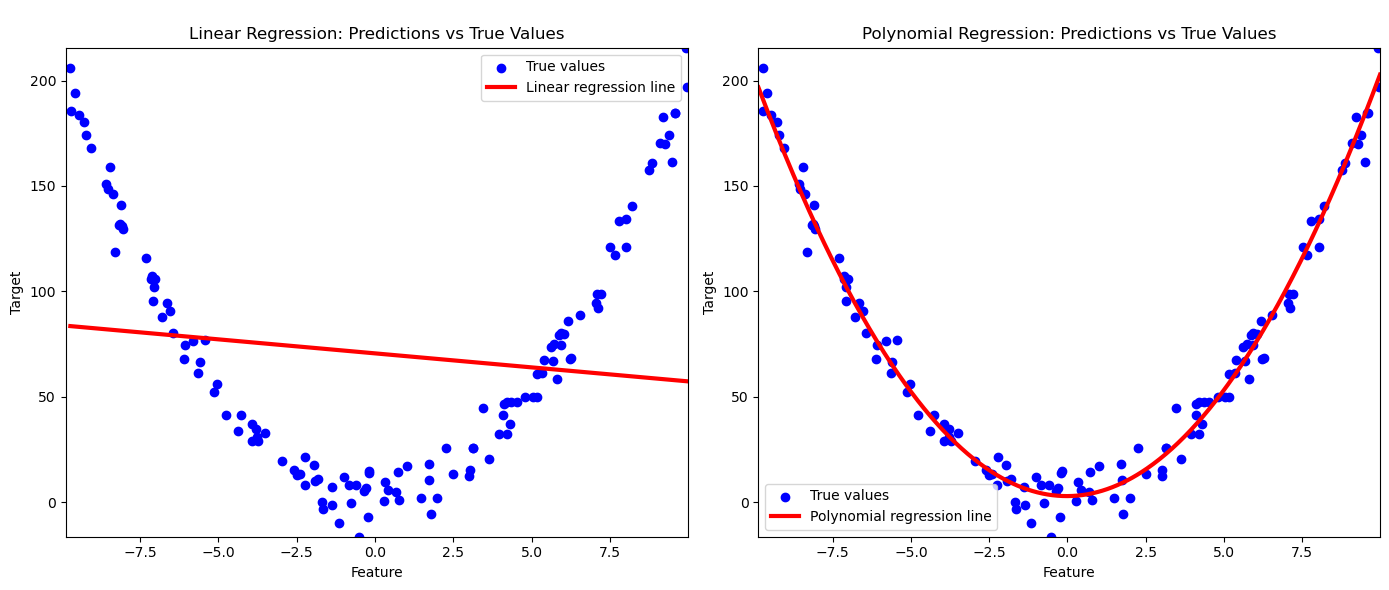

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data with 1 feature and noise
X = np.random.uniform(-10, 10, 500)  # 1D array (no reshape needed here)

# Convert y to a more complex target function: y = 2*X^2 + 3 + noise
y = 2*X**2 + 3 + np.random.normal(0, 8, X.shape)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set (reshaped for linear regression)
# X_train is reshaped from a 1D array of shape (n_samples,) to a 2D array of shape (n_samples, 1).
# .reshape(-1, 1) is used to transform X_train into a 2D array with one column, 
# where -1 tells NumPy to infer the number of rows automatically (i.e., the number of samples), 
# and 1 indicates there is only one feature per sample.
model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on validation and testing sets
y_val_pred = model.predict(X_val.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Testing the Linear Regression model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics for Linear Regression
print("\nLinear Regression Test Metrics:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R²:", test_r2)

# Polynomial Regression: Fit a higher-degree polynomial (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_val_poly = poly_features.transform(X_val.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

# Train the Polynomial Regression model
model.fit(X_train_poly, y_train)

# Make predictions on validation and testing sets
y_val_pred_poly = model.predict(X_val_poly)
y_test_pred_poly = model.predict(X_test_poly)

# Testing the Polynomial Regression model
test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
test_mae_poly = mean_absolute_error(y_test, y_test_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

# Print metrics for Polynomial Regression
print("\nPolynomial Regression Test Metrics:")
print("MSE:", test_mse_poly)
print("MAE:", test_mae_poly)
print("R²:", test_r2_poly)

# Visualize results for both models
plt.figure(figsize=(14, 6))

# Get global min and max for X and y to set the same axis range
x_min, x_max = X.min(), X.max()
y_min, y_max = y.min(), y.max()

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Sort X_val for a smooth fitted line
sorted_indices = np.argsort(X_val)
X_val_sorted = X_val[sorted_indices]
y_val_pred_sorted = y_val_pred[sorted_indices]

plt.plot(X_val_sorted, y_val_pred_sorted, color='red', linewidth=3, label='Linear regression line')
plt.title('\nLinear Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Set the same x and y axis limits for both plots
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Create a smooth curve for the polynomial regression fitted line
X_smooth = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Reshaping for smooth curve
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth_pred_poly = model.predict(X_smooth_poly)

plt.plot(X_smooth, y_smooth_pred_poly, color='red', linewidth=3, label='Polynomial regression line')
plt.title('Polynomial Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Set the same x and y axis limits for both plots
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


Linear Regression Test Metrics:
MSE: 13958.65664155907
MAE: 96.80255627937005
R²: 0.613039510532401

Polynomial Regression Test Metrics:
MSE: 1251.3247023405575
MAE: 29.502951222826564
R²: 0.9653109012038484


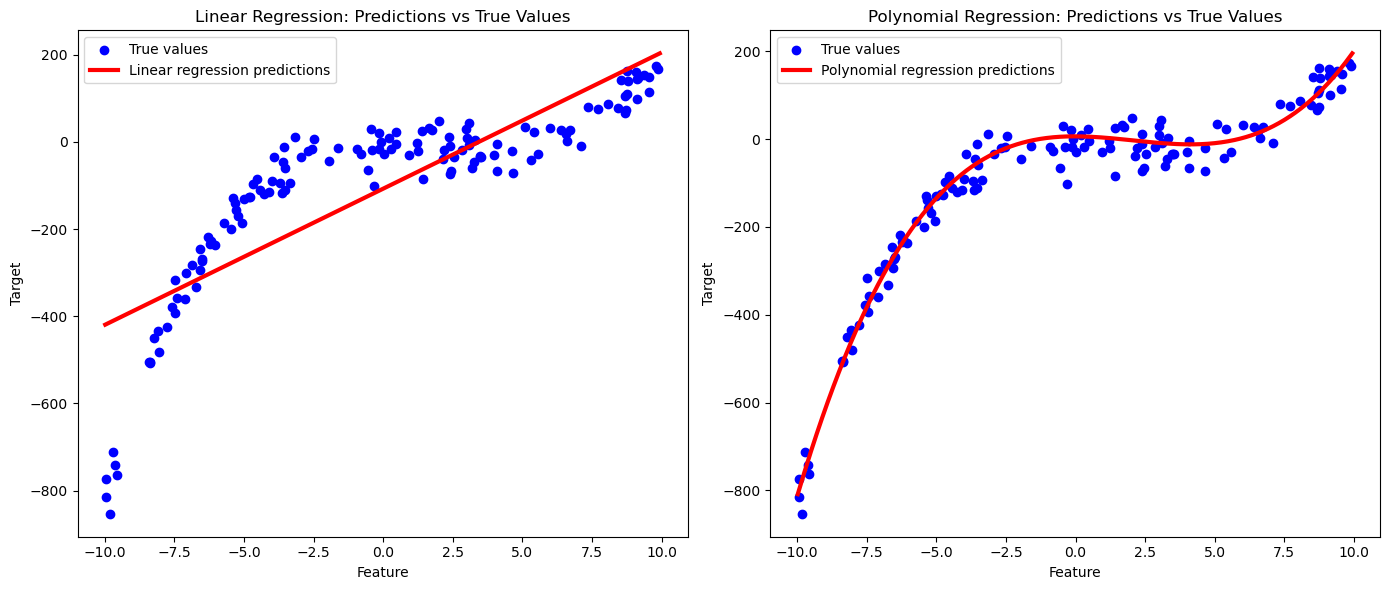

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate random X values (500 samples between -10 and 10)
X = np.random.uniform(-10, 10, 500)  # 1D array directly

# Generate Y values using a more complex function of X
# y = 0.5 * X^3 - 3 * X^2 + 2 * sin(X) + noise
y = 0.5 * X**3 - 3 * X**2 + 2 * np.sin(X) + np.random.normal(0, 30, X.shape)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Initialize the Linear Regression model
lin_reg_model = LinearRegression()

# Train the model on the training set
# Train the model on the training set (reshaped for linear regression)
# X_train is reshaped from a 1D array of shape (n_samples,) to a 2D array of shape (n_samples, 1).
# .reshape(-1, 1) is used to transform X_train into a 2D array with one column, 
# where -1 tells NumPy to infer the number of rows automatically (i.e., the number of samples), 
# and 1 indicates there is only one feature per sample.
lin_reg_model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on validation and testing sets
y_val_pred_lin = lin_reg_model.predict(X_val.reshape(-1, 1))
y_test_pred_lin = lin_reg_model.predict(X_test.reshape(-1, 1))

# Evaluate the Linear Regression model
val_mse_lin = mean_squared_error(y_val, y_val_pred_lin)
val_mae_lin = mean_absolute_error(y_val, y_val_pred_lin)
val_r2_lin = r2_score(y_val, y_val_pred_lin)

test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)
test_mae_lin = mean_absolute_error(y_test, y_test_pred_lin)
test_r2_lin = r2_score(y_test, y_test_pred_lin)

# Print test metrics for Linear Regression
print("\nLinear Regression Test Metrics:")
print("MSE:", test_mse_lin)
print("MAE:", test_mae_lin)
print("R²:", test_r2_lin)

# Initialize the Polynomial Regression model (degree 3 for this more complex function)
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_val_poly = poly_features.transform(X_val.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on validation and testing sets (Polynomial Regression)
y_val_pred_poly = poly_reg_model.predict(X_val_poly)
y_test_pred_poly = poly_reg_model.predict(X_test_poly)

# Evaluate the Polynomial Regression model
val_mse_poly = mean_squared_error(y_val, y_val_pred_poly)
val_mae_poly = mean_absolute_error(y_val, y_val_pred_poly)
val_r2_poly = r2_score(y_val, y_val_pred_poly)

test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
test_mae_poly = mean_absolute_error(y_test, y_test_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

# Print test metrics for Polynomial Regression
print("\nPolynomial Regression Test Metrics:")
print("MSE:", test_mse_poly)
print("MAE:", test_mae_poly)
print("R²:", test_r2_poly)

# Visualize the results for Linear Regression
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Create a smooth line for linear regression predictions
X_smooth = np.linspace(X.min(), X.max(), 500)  # Dense grid for smooth plotting
y_smooth_pred_lin = lin_reg_model.predict(X_smooth.reshape(-1, 1))

plt.plot(X_smooth, y_smooth_pred_lin, color='red', linewidth=3, label='Linear regression predictions')
plt.title('Linear Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Polynomial Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_val, y_val, color='blue', label='True values')

# Create a smooth line for polynomial regression predictions
X_smooth_poly = poly_features.transform(X_smooth.reshape(-1, 1))
y_smooth_pred_poly = poly_reg_model.predict(X_smooth_poly)

plt.plot(X_smooth, y_smooth_pred_poly, color='red', linewidth=3, label='Polynomial regression predictions')
plt.title('Polynomial Regression: Predictions vs True Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()